In [1]:
#######################################################
#######################################################
#######################################################

## Multiple Regression: Multiple Linear - 3 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 1 of MultipleRegression - MultipleLinear for Task 1-8
#### Task 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [2]:

import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter('ignore')

from pathlib import Path
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)

data_dir = str(main_dir) + "/data"
print(data_dir)




C:\
C:\/data


#### Task 2
##### Read in the `insurance.csv` file and name it as `ex_data`.
#### Result:


In [3]:

ex_data = pd.read_csv("insurance.csv")



#### Task 3
##### Create a subset of `charges` and ['age', 'bmi'] from ex_data and save as `ex_regression`.
##### Print the head of `ex_regression`.
##### Print the summary statistics of `ex_regression`.
#### Result:


In [4]:

ex_all_features = ['age', 'bmi']
ex_all_features.append("charges")

ex_regression = ex_data[ex_all_features]

# Preview the new dataset.
print(ex_regression.head())



   age     bmi      charges
0   19  27.900  16884.92400
1   18  33.770   1725.55230
2   28  33.000   4449.46200
3   33  22.705  21984.47061
4   32  28.880   3866.85520


#### Task 4
##### Print the covariance of `ex_regression`.
##### Print the correlation matrix of `ex_regression`. Save it to `ex_cor`.
##### Create a correlation plot of `ex_regression` and print it.
#### Result:


In [5]:

print(ex_regression.cov())
print(ex_regression.corr())
ex_cor = ex_regression.corr()
# Create correlation plot.
ex_cor.style.background_gradient()



                  age           bmi       charges
age        197.243282      9.368233  5.073683e+04
bmi          9.368233     37.215715  1.465763e+04
charges  50736.833698  14657.628526  1.466608e+08
              age       bmi   charges
age      1.000000  0.109344  0.298308
bmi      0.109344  1.000000  0.198401
charges  0.298308  0.198401  1.000000


,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


#### Task 5
##### Check the number of NAs in each column.
##### Substitute the NAs with the mean value in each of the respective columns.
##### Check each column again to confirm that there are no null values.
#### Result:


In [6]:

# Check how many values are null in the DataFrame.
print(ex_regression.isnull().sum())
ex_regression = ex_regression.dropna()



age        0
bmi        0
charges    0
dtype: int64


#### Task 6
##### Create a scatter plot matrix of the variables in `ex_regression`.


#### Result:


(array([535., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

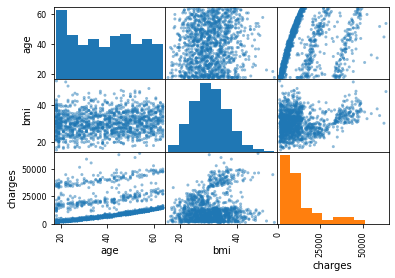

In [7]:

# Make scatter plot matrix.
scatter_matrix(ex_regression)

# Plot a histogram of `charges`.
plt.hist(ex_regression["charges"], bins = 10)





#### Task 7
##### Check the variables for zero variance using the `VarianceThreshold` function.
##### Instantiate the function and save it to `selector`.
##### Save the cleaned dataset to `ex_regression_clean`.
##### Print the shape of the new dataset.
##### What is the number of columns in the new dataset? 
#### Result:


In [8]:

# Using sklearn, look for low variance within the columns.
# Let's instantiate the function.
selector = VarianceThreshold()
# Name the cleaned dataset ex_m_regression_clean.
ex_regression_clean = selector.fit_transform(ex_regression)
# Let's see if the dimensions changed.
print(ex_regression_clean.shape)
ex_regression_clean = pd.DataFrame(ex_regression_clean, columns = ex_all_features)
ex_regression_clean.head()



(1337, 3)


,age,bmi,charges
0,19.0,27.900,16884.92400
1,18.0,33.770,1725.55230
2,28.0,33.000,4449.46200
3,33.0,22.705,21984.47061
4,32.0,28.880,3866.85520


#### Task 8
##### Split our dataset `ex_regression` for modeling into `ex_X` and `ex_y` variables.
##### Save the predictors into `ex_X`. Add a constant to `ex_X`.
##### Save the target variable `charges` into `ex_y`.
#### Result:


In [9]:

# Three variables for multiple regression.
# X - ['age', 'bmi']
ex_X = ex_regression_clean[['age', 'bmi']]
# Add a constant.
ex_X = sm.add_constant(ex_X)

# y - `charges`
ex_y = ex_regression_clean[["charges"]]


#### Please refer to module 2 of MultipleRegression - MultipleLinear for Task 9-14
#### Task 9
##### Set the random seed to `1`.
##### Split 70% of `ex_regression` dataset to the train set and the remaining 30% to the test set. 
##### Split the sets into `ex_X` and `ex_y` as `ex_X_train`, `ex_X_test`, `ex_y_train` and `ex_y_test` respectively.
##### Check the shape of the train set and test set to see if they've split correctly.
#### Result:


In [10]:

# Set the seed.
np.random.seed(1)

# Create the train and test sets.
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, ex_y, test_size=0.3)
# Check to see if the datasets split correctly.
print(ex_X_train.shape, ex_y_train.shape)
print(ex_X_test.shape, ex_y_test.shape)



(935, 3) (935, 1)
(402, 3) (402, 1)


#### Task 10
##### Use `sm.OLS()` function to run multiple linear regression on our training data, `ex_y_train` and `ex_X_train`. 
##### Save the model to `ex_model_m` and view its summary.
#### Result:


In [11]:

# Build a linear model on training data.
ex_model_m = sm.OLS(ex_y_train, ex_X_train).fit()
ex_model_m.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     63.01
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.16e-26
Time:                        10:30:51   Log-Likelihood:                -10060.
No. Observations:                 935   AIC:                         2.013e+04
Df Residuals:                     932   BIC:                         2.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7019.2682   2091.280     -3.356      0.001   -1.11e+04   -2915.106
age          230.3677     26.705      8.626      0.000     177.958     282.777
bmi          377.4248     62.140      6.074      0.000     255.475     499.375
==============================================================================
Omnibus:                      192.202   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.535
Skew:                           1.375   Prob(JB):                     4.11e-70
Kurtosis:                       3.798   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Task 11
##### Save the fitted values into `ex_fitted_m` and the residuals into `ex_residuals_m` from our model `ex_model`.
##### Save the normalized results to ` ex_model_m_norm_residuals` and the absolute squared residuals to ` ex_model_m_norm_residuals_abs_sqrt`.
##### Derive the absolute residuals to `ex_model_m_abs_resid`.
##### Combine `ex_X_train` and `ex_y_train` into one DataFrame named `ex_frames` for plotting.
##### Concatenate by columns and save to `ex_training`.
#### Result:


In [12]:

# Save the fitted values.
ex_fitted_m = ex_model_m.fittedvalues
print(ex_fitted_m.head())

# Save the residuals.
ex_residuals_m = ex_model_m.resid
print(ex_residuals_m.head())

# Save the normalized residuals.
ex_model_m_norm_residuals = ex_model_m.get_influence().resid_studentized_internal
# Save the absolute squared normalized residuals.
ex_model_m_norm_residuals_abs_sqrt = np.sqrt(np.abs(ex_model_m_norm_residuals))
# Save the absolute residuals.
ex_model_m_abs_resid = np.abs(ex_residuals_m)

# Combine X_train and y_train into one DataFrame for plotting.
ex_frames = [ex_X_train,ex_y_train]
ex_training = pd.concat(ex_frames, axis = 1) # axis = 1 lets us combine by columns



520    17042.226202
575     8178.904954
769    20658.200794
314    17509.230342
426     8134.946781
dtype: float64
520   -13048.048402
575    -6513.905354
769     7283.086786
314    -7786.460842
426     -811.211962
dtype: float64


#### Task 12
##### Test the assumption that the relationship between the predictor and target variable is linear.
##### Does our model satisfy this assumption?
#### Result:


Text(0, 0.5, 'Residuals')

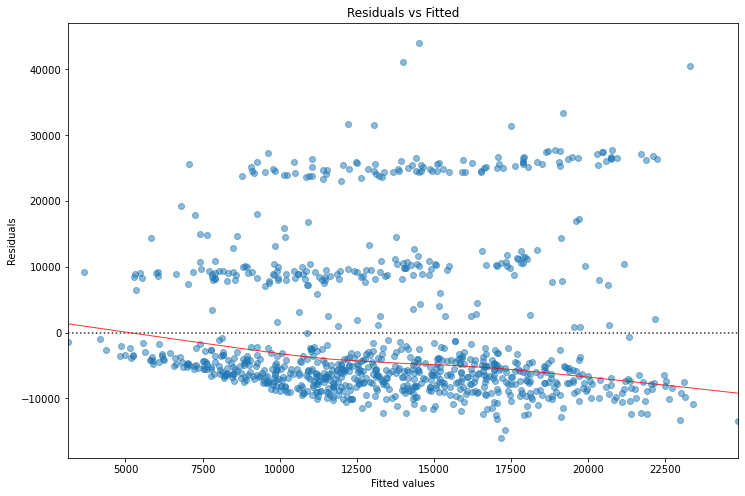

In [13]:

import seaborn as sns

# Let's plot assumption 1.
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(ex_fitted_m, 'charges', data = ex_training, 
                          lowess = True, 
                          scatter_kws = {'alpha': 0.5}, 
                          line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')



#### Task 13
##### Test the assumption that the residuals are normally distributed.
##### Does our model satisfy the assumption?
#### Result:


Text(0, 0.5, 'Standardized Residuals')

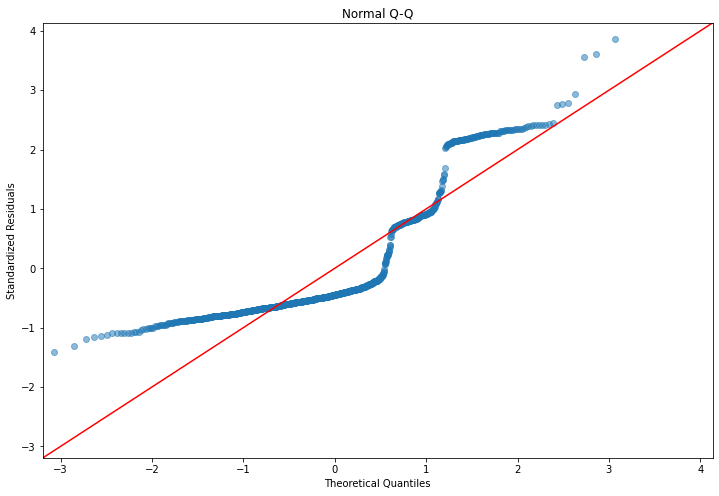

In [14]:

from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(ex_model_m_norm_residuals)
plot_lm_2 = QQ.qqplot(line = '45', alpha = 0.5, color = '#4C72B0', lw = 1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')



#### Task 14
##### Test the assumption that the residuals have equal variance.
##### Does our model satisfy the assumption?
#### Result:


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

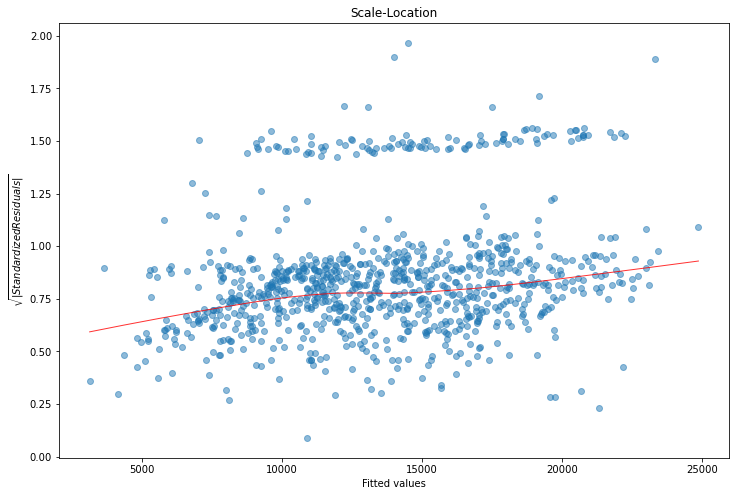

In [15]:

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(ex_fitted_m, ex_model_m_norm_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(ex_fitted_m, ex_model_m_norm_residuals_abs_sqrt, 
            scatter = False, 
            ci = False, 
            lowess = True,
            line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


#### Please refer to module 3 of MultipleRegression - MultipleLinear for Task 15-22
#### Task 15
##### Test the model `ex_model_m` for outliers using the `statsmodel.outlier_test()` function.
##### Save it to `ex_test_m`.
#### Result:


In [16]:

# Let's find influential points.
ex_test_m = ex_model_m.outlier_test()
print('Bad data points (bonf(p) < 0.05):\n', ex_test_m[ex_test_m['bonf(p)'] < 0.05])

# Save the final outliers.
test_final_m = ex_test_m[ex_test_m['bonf(p)'] < 0.05]



Bad data points (bonf(p) < 0.05):
 Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


#### Task 16
##### Remove the outliers from our original train set `ex_X_train` and `ex_y_train`. Save them as `ex_X_train_no_outliers` and `ex_y_train_no_outliers`.
##### Print the shape of the new DataFrame. Is there any change in the DataFrame?
#### Result:


In [17]:

# Make sure that you drop outliers from both X and y train sets.
ex_X_train_no_outliers = ex_X_train.drop(test_final_m.index)
ex_y_train_no_outliers = ex_y_train.drop(test_final_m.index)

# Look at the shape of the new DataFrame, notice the rows have actually been dropped.
print(ex_X_train_no_outliers.shape)

print(ex_y_train_no_outliers.shape)




(935, 3)
(935, 1)


#### Task 17
##### Rerun the multiple linear regression on our new DataFrames, `ex_y_train_no_outliers` and `ex_X_train_no_outliers`.
##### Save it as `ex_model_m_no_outliers` and print its summary.
#### Result:


In [18]:

ex_model_m_no_outliers = sm.OLS(ex_y_train_no_outliers, ex_X_train_no_outliers).fit()
ex_model_m_no_outliers.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     63.01
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           2.16e-26
Time:                        10:30:53   Log-Likelihood:                -10060.
No. Observations:                 935   AIC:                         2.013e+04
Df Residuals:                     932   BIC:                         2.014e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7019.2682   2091.280     -3.356      0.001   -1.11e+04   -2915.106
age          230.3677     26.705      8.626      0.000     177.958     282.777
bmi          377.4248     62.140      6.074      0.000     255.475     499.375
==============================================================================
Omnibus:                      192.202   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.535
Skew:                           1.375   Prob(JB):                     4.11e-70
Kurtosis:                       3.798   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Task 18
##### Derive the fitted values and the residuals. Save them as `ex_fitted_m_no_outliers` and `ex_residuals_m_no_outliers`.
#### Result:


In [19]:

ex_fitted_m_no_outliers = ex_model_m_no_outliers.fittedvalues
print(ex_fitted_m_no_outliers.head())

ex_residuals_m_no_outliers = ex_model_m_no_outliers.resid
print(ex_residuals_m_no_outliers.head())



520    17042.226202
575     8178.904954
769    20658.200794
314    17509.230342
426     8134.946781
dtype: float64
520   -13048.048402
575    -6513.905354
769     7283.086786
314    -7786.460842
426     -811.211962
dtype: float64


#### Task 19
##### Test the model using Variance Inflation Factor(VIF) to check for collinearity.
##### Is there any feature that is highly collinear?
#### Result:


In [20]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ex_X_train_no_outliers.values, i) for i in range(ex_X_train_no_outliers.shape[1])]
vif["features"] = ex_X_train_no_outliers.columns
print(vif)



   VIF Factor features
0   31.417838    const
1    1.015198      age
2    1.015198      bmi


#### Task 20
##### Predict `charges` using the test data `ex_X_test`.
##### Save it as `ex_prediction`.
#### Result:


In [21]:

# Predict values of `charges` using the test data.
ex_prediction = ex_model_m_no_outliers.predict(ex_X_test)
print(ex_prediction.head())



628     17817.610088
1086    18015.672534
283     16735.509401
789     17741.432225
593     17620.933431
dtype: float64


#### Task 21
##### Create a DataFrame named `ex_results` with the columns containing:
##### - `actual` using `ex_y_test["charges"]`
##### - `predicted` using `ex_model_m_no_outliers.predict(ex_X_test)` 
##### - `residuals` which is `actual` - `predicted`
##### Print the head of the new DataFrame.
#### Result:


In [22]:

actual = ex_y_test["charges"]
prediction = ex_model_m_no_outliers.predict(ex_X_test)
residuals = ex_y_test["charges"] - prediction

ex_results =  pd.concat([actual.rename('actual'),
                              prediction.rename('predicted'),
                              residuals.rename('residuals')], axis = 1)
                              
print(ex_results.head())



          actual     predicted     residuals
628   42983.4585  17817.610088  25165.848412
1086  11353.2276  18015.672534  -6662.444934
283    9625.9200  16735.509401  -7109.589401
789    5662.2250  17741.432225 -12079.207225
593    5709.1644  17620.933431 -11911.769031


#### Task 22
##### Calculate the RMSE using `actual` and `predicted` and print it.
#### Result:


In [23]:
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(prediction,actual))






11372.765079395042
